In [132]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [133]:
class QuadState(TypedDict):
    a : int
    b : int
    c : int

    equation : str
    discriminant : float
    result : str

In [134]:
def show_equation(state: QuadState):
    
    equation = f'{state["a"]}x2{state["b"]}x{state["c"]}'

    return {'equation': equation}

In [135]:
def calculate_discriminant(state: QuadState):

    discriminant = state["b"]**2 - (4*state["a"]*state["c"])

    return {'discriminant': discriminant}
             



In [136]:
def real_roots(state: QuadState):

    root1 = (-state['b'] + state['discriminant']**0.5) / (2*state['a'])
    root2 = (-state['b'] - state['discriminant']**0.5) / (2*state['a'])
    result = f'The roots are {root1} and {root2}'

    return {'result': result}

In [137]:
def repeated_roots(state: QuadState):

    root = (-state['b']) / (2*state['a'])

    result = f'Only repeating root is {root}'

    return {'result': result}

In [138]:
def no_real_roots(state: QuadState):

    result = f'No real roots'

    return {'result': result}

In [139]:
def check_condition(state: QuadState) -> Literal["real_roots", "repeated_roots", "no_real_roots"]:

    if state['discriminant'] > 0:
        return "real_roots"
    elif state['discriminant'] == 0:
        return "repeated_roots"
    else: 
        return "no_real_roots"

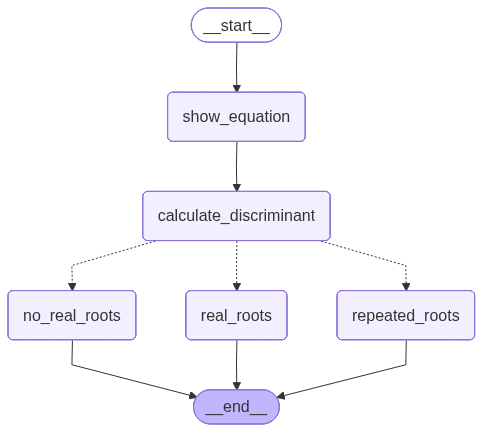

In [140]:
graph = StateGraph(QuadState)

graph.add_node('show_equation', show_equation)
graph.add_node('calculate_discriminant', calculate_discriminant)
graph.add_node('real_roots', real_roots)
graph.add_node('repeated_roots' , repeated_roots)
graph.add_node('no_real_roots', no_real_roots)

graph.add_edge(START, 'show_equation')
graph.add_edge('show_equation', 'calculate_discriminant')

graph.add_conditional_edges('calculate_discriminant', check_condition)

graph.add_edge('real_roots' , END)
graph.add_edge('repeated_roots' , END)
graph.add_edge('no_real_roots' , END)

workflow = graph.compile()

workflow

In [141]:
initial_state = {
    'a' : 4,
    'b' : -5,
    'c' : -4
}

workflow.invoke(initial_state)


{'a': 4,
 'b': -5,
 'c': -4,
 'equation': '4x2-5x-4',
 'discriminant': 89,
 'result': 'The roots are 1.8042476415070754 and -0.5542476415070754'}